In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest



from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import category_encoders as ce
from sklearn.feature_selection import SelectPercentile

from sklearn.metrics import mean_absolute_percentage_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.metrics import classification_report, RocCurveDisplay, DetCurveDisplay,PrecisionRecallDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from sklearn.inspection import permutation_importance
from collections import defaultdict
from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA
import shap

In [43]:
path_train =  'train_house_B.csv'
df = pd.read_csv(path_train)
df

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3360000,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,...,-0.141322,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431
404,5950000,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,...,-0.141322,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408
405,3675000,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,...,-0.141322,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431
406,7455000,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,...,-0.141322,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408


In [44]:
duplicates = df.duplicated()
df[duplicates]

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28


In [45]:
y = df.price
X = df.drop(columns=['price'])

In [46]:
# задаем определенное стартовое значение для воспроизводимости результата
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(X.values), 50))
# добавляем к данным шумовые признаки
# первые 30 признаков являются исходными, остальные 50 являются шумовыми
X_w_noise = np.hstack([X, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, df['price'], random_state=42, test_size=.3)
# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select_pct = SelectPercentile(percentile=50)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

форма массива X_train: (285, 79)
форма массива X_train_selected: (285, 39)


Features [10] are constant.
invalid value encountered in true_divide


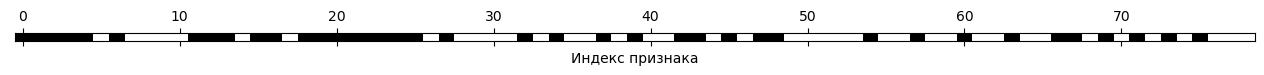

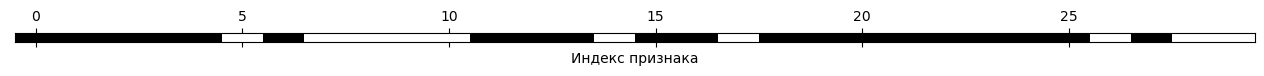

In [47]:
mask = select_pct.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");

mask = select_pct.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.xlabel("Индекс признака");

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3, shuffle = True)

In [49]:
pipe = Pipeline([('classifier', RandomForestRegressor())])

kfold = KFold(n_splits=7, shuffle=True)

param_grid =[
    { 'classifier': [RandomForestRegressor()],
     'classifier__n_estimators': [30],
     'classifier__criterion': ['friedman_mse'],
     'classifier__min_samples_split': np.arange(2, 10, 3),
     'classifier__min_samples_leaf': np.arange(2, 10, 3),
     'classifier__max_features': ['log2', 'sqrt', None],
     'classifier__warm_start': [True, False],
     'classifier__n_jobs': [-1],
     'classifier__random_state': [42]
     }]

grid_rf = GridSearchCV(pipe, param_grid, cv=kfold, scoring = 'neg_mean_absolute_percentage_error')
grid_rf.fit(X_train,y_train)
grid_rf

GridSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestRegressor())]),
             param_grid=[{'classifier': [RandomForestRegressor()],
                          'classifier__criterion': ['friedman_mse'],
                          'classifier__max_features': ['log2', 'sqrt', None],
                          'classifier__min_samples_leaf': array([2, 5, 8]),
                          'classifier__min_samples_split': array([2, 5, 8]),
                          'classifier__n_estimators': [30],
                          'classifier__n_jobs': [-1],
                          'classifier__random_state': [42],
                          'classifier__warm_start': [True, False]}],
             scoring='neg_mean_absolute_percentage_error')

In [50]:
results_rf = pd.DataFrame(grid_rf.cv_results_).sort_values(['rank_test_score', 'std_test_score'])
display(results_rf.T)

,41,40,39,38,37,36,47,46,42,44,...,15,14,17,16,31,32,33,35,30,34
mean_fit_time,0.165324,0.155242,0.090885,0.117678,0.127303,0.102503,0.076713,0.108601,0.146918,0.121275,...,0.120803,0.09956,0.105682,0.083846,0.082212,0.098623,0.109412,0.085703,0.084505,0.083449
std_fit_time,0.044824,0.038,0.010003,0.021908,0.057992,0.017859,0.009598,0.040576,0.007012,0.032671,...,0.026925,0.012163,0.026381,0.017532,0.01771,0.074887,0.054607,0.025432,0.01577,0.018706
mean_score_time,0.028233,0.022886,0.029444,0.018456,0.017877,0.01853,0.018474,0.020291,0.025095,0.020056,...,0.0249,0.021358,0.02109,0.019755,0.02162,0.020106,0.024203,0.020096,0.019256,0.018661
std_score_time,0.007201,0.00647,0.025474,0.002036,0.00148,0.001234,0.001964,0.003083,0.00937,0.003133,...,0.012414,0.004283,0.00413,0.002552,0.00914,0.002629,0.006908,0.004577,0.003994,0.001386
param_classifier,RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),...,RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor()
param_classifier__criterion,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,...,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse
param_classifier__max_features,None,None,None,None,None,None,None,None,None,None,...,log2,log2,log2,log2,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt
param_classifier__min_samples_leaf,2,2,2,2,2,2,5,5,5,5,...,8,8,8,8,8,8,8,8,8,8
param_classifier__min_samples_split,8,8,5,5,2,2,8,8,2,5,...,5,5,8,8,2,5,5,8,2,8
param_classifier__n_estimators,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [51]:
rf_itog = RandomForestRegressor(n_estimators = 30, 
                                 min_samples_split = 8, 
                                 criterion = 'friedman_mse',
                                 min_samples_leaf = 2,
                                 max_features = 'log2',
                                random_state = 42, 
                                n_jobs = -1,
                               warm_start = True)

In [52]:
rf_itog.fit(X_train, y_train)
y_pred_itog_rf_train = rf_itog.predict(X_train)
y_pred_itog_rf_test = rf_itog.predict(X_test)
print('mean_absolute_percentage_error на обучающем наборе: {:.3f}'.format(mean_absolute_percentage_error(y_pred_itog_rf_train, y_train)))
print('mean_absolute_percentage_error на тестовом наборе: {:.3f}'.format(mean_absolute_percentage_error(y_pred_itog_rf_test, y_test)))
print('Cross validation score mean: {:.3f}'.format(np.mean(cross_val_score(rf_itog, X, y, scoring='neg_mean_absolute_percentage_error', cv=10))))
print('Cross validation score std: {:.3f}'.format(np.std(cross_val_score(rf_itog, X, y, scoring='neg_mean_absolute_percentage_error', cv=10))))

mean_absolute_percentage_error на обучающем наборе: 0.116
mean_absolute_percentage_error на тестовом наборе: 0.182
Cross validation score mean: -0.199
Cross validation score std: 0.032


In [53]:
gbrt = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, subsample=0.7,random_state=42)
gbrt.fit(X_train, y_train)
y_pred_itog_gbrt_train = gbrt.predict(X_train)
y_pred_itog_gbrt_test = gbrt.predict(X_test)
print('mean_absolute_percentage_error на обучающем наборе: {:.3f}'.format(mean_absolute_percentage_error(y_pred_itog_gbrt_train, y_train)))
print('mean_absolute_percentage_error на тестовом наборе: {:.3f}'.format(mean_absolute_percentage_error(y_pred_itog_gbrt_test, y_test)))
print('Cross validation score mean: {:.3f}'.format(np.mean(cross_val_score(gbrt, X, y, scoring='neg_mean_absolute_percentage_error', cv=10))))
print('Cross validation score std: {:.3f}'.format(np.std(cross_val_score(gbrt, X, y, scoring='neg_mean_absolute_percentage_error', cv=10))))


mean_absolute_percentage_error на обучающем наборе: 0.101
mean_absolute_percentage_error на тестовом наборе: 0.186
Cross validation score mean: -0.186
Cross validation score std: 0.028


In [54]:
pipe = Pipeline([('classifier', Ridge())])  

kfold = KFold(n_splits=7, shuffle=True)

param_grid = [
    {'classifier': [Ridge(), Lasso()],  
     'classifier__alpha': np.array([0.3, 0.1, 0.5, 1]),  
     'classifier__random_state': [42]  
     }]

grid_reg = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_absolute_percentage_error')
grid_reg.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('classifier', Ridge())]),
             param_grid=[{'classifier': [Ridge(), Lasso()],
                          'classifier__alpha': array([0.3, 0.1, 0.5, 1. ]),
                          'classifier__random_state': [42]}],
             scoring='neg_mean_absolute_percentage_error')

In [55]:
results_reg = pd.DataFrame(grid_reg.cv_results_).sort_values(['rank_test_score', 'std_test_score'])
display(results_reg.T)

,3,2,0,1,7,6,4,5
mean_fit_time,0.002913,0.002806,0.004696,0.00316,0.003469,0.003507,0.00332,0.003976
std_fit_time,0.000187,0.00022,0.001589,0.000642,0.000055,0.000054,0.000134,0.000555
mean_score_time,0.001827,0.001787,0.00287,0.002108,0.00189,0.001892,0.001912,0.002064
std_score_time,0.00013,0.000166,0.001105,0.000377,0.000061,0.000063,0.000376,0.000419
param_classifier,Ridge(),Ridge(),Ridge(),Ridge(),Lasso(),Lasso(),Lasso(),Lasso()
param_classifier__alpha,1.0,0.5,0.3,0.1,1.0,0.5,0.3,0.1
param_classifier__random_state,42,42,42,42,42,42,42,42
params,"{'classifier': Ridge(), 'classifier__alpha': 1...","{'classifier': Ridge(), 'classifier__alpha': 0...","{'classifier': Ridge(), 'classifier__alpha': 0...","{'classifier': Ridge(), 'classifier__alpha': 0...","{'classifier': Lasso(), 'classifier__alpha': 1...","{'classifier': Lasso(), 'classifier__alpha': 0...","{'classifier': Lasso(), 'classifier__alpha': 0...","{'classifier': Lasso(), 'classifier__alpha': 0..."
split0_test_score,-0.209692,-0.209984,-0.210102,-0.21022,-0.21028,-0.21028,-0.21028,-0.21028
split1_test_score,-0.159455,-0.15956,-0.159603,-0.159646,-0.159667,-0.159667,-0.159667,-0.159667


In [56]:
reg_itog = Ridge(alpha = 1, random_state = 42)

In [57]:
reg_itog.fit(X_train, y_train)
y_pred_itog_reg_train = reg_itog.predict(X_train)
y_pred_itog_reg_test = reg_itog.predict(X_test)
print('mean_absolute_percentage_error на обучающем наборе: {:.3f}'.format(mean_absolute_percentage_error(y_pred_itog_reg_train, y_train)))
print('mean_absolute_percentage_error на тестовом наборе: {:.3f}'.format(mean_absolute_percentage_error(y_pred_itog_reg_test, y_test)))
print('Cross validation score mean: {:.3f}'.format(np.mean(cross_val_score(reg_itog, X, y, scoring='neg_mean_absolute_percentage_error', cv=10))))
print('Cross validation score std: {:.3f}'.format(np.std(cross_val_score(reg_itog, X, y, scoring='neg_mean_absolute_percentage_error', cv=10))))


mean_absolute_percentage_error на обучающем наборе: 0.156
mean_absolute_percentage_error на тестовом наборе: 0.169
Cross validation score mean: -0.181
Cross validation score std: 0.024


# Корреляция

Оптимально : 9


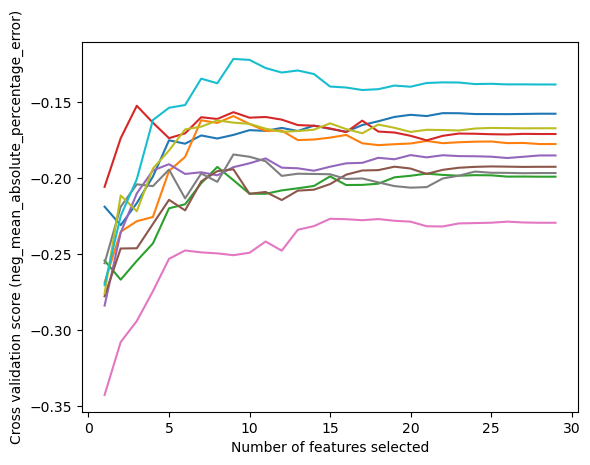

In [58]:
# Create the RFE object and compute a cross-validated score.
RF = reg_itog
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=RF,
    step=1,
    cv=KFold(10),
    scoring="neg_mean_absolute_percentage_error",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)


print("Оптимально : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (neg_mean_absolute_percentage_error)")
filtered = pd.DataFrame(rfecv.cv_results_).filter(regex='split') #[s for s in rfecv.cv_results_.keys() if 'split' in s]
plt.plot(
    range(min_features_to_select, len(filtered) + min_features_to_select),
    filtered
)
plt.show()

In [59]:
#удалим фичи
rfe_select = RFE(reg_itog, step = 1, 
                 n_features_to_select=15)
rfe_select.fit(X_train, y_train)

RFE(estimator=Ridge(alpha=1, random_state=42), n_features_to_select=15)

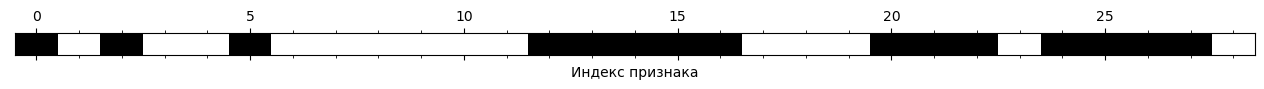

In [60]:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

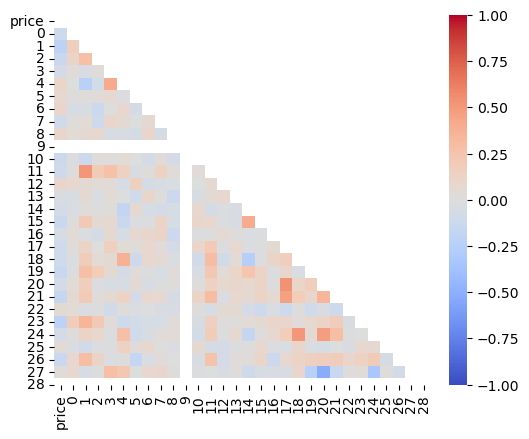

In [61]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Коэффициент корреляции Спирмена (отдельная тема можно ли использовать)
corr1 = X_train.corr(method = 'spearman')
mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr1, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            mask=mask,
            square=True,
            vmin = -1, vmax = 1,
           cmap ='coolwarm')
plt.show()

In [62]:
rfe_select = RFE(reg_itog, step = 1, 
                 n_features_to_select=15)
rfe_select.fit(X_train, y_train)

RFE(estimator=Ridge(alpha=1, random_state=42), n_features_to_select=15)

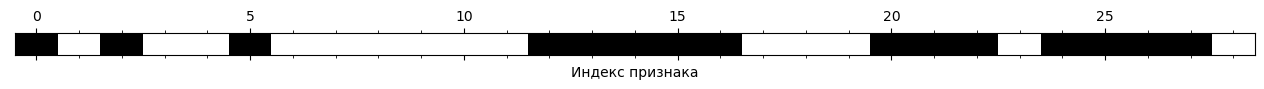

In [63]:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

In [64]:
X_train_imp = X_train[X_train.columns[mask]]
X_test_imp = X_test[X_train.columns[mask]]
features_names_imp = X_train.columns[mask]

In [65]:
features_names_imp

Index(['0', '2', '5', '12', '13', '14', '15', '16', '20', '21', '22', '24',
       '25', '26', '27'],
      dtype='object')

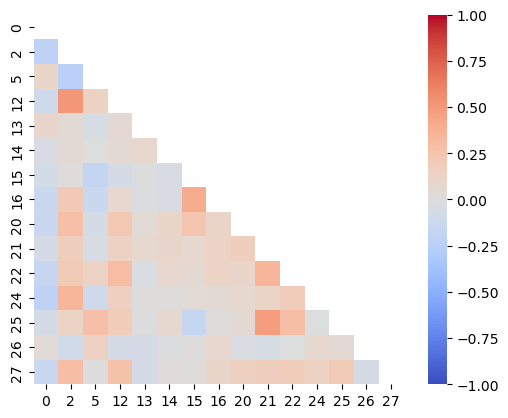

In [66]:
corr = X_train_imp.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Коэффициент корреляции Спирмена (отдельная тема можно ли использовать)
corr1 = X_train_imp.corr(method = 'spearman')
mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr1, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            mask=mask,
            square=True,
            vmin = -1, vmax = 1,
           cmap ='coolwarm')
plt.show()

In [67]:
X = X[features_names_imp]

In [68]:
reg_itog.fit(X_train_imp, y_train)
y_pred_itog_reg_train = reg_itog.predict(X_train_imp)
y_pred_itog_reg_test = reg_itog.predict(X_test_imp)
print('mean_absolute_percentage_error на обучающем наборе: {:.3f}'.format(mean_absolute_percentage_error(y_pred_itog_reg_train, y_train)))
print('mean_absolute_percentage_error на тестовом наборе: {:.3f}'.format(mean_absolute_percentage_error(y_pred_itog_reg_test, y_test)))
print('Cross validation score mean: {:.3f}'.format(np.mean(cross_val_score(reg_itog, X, y, scoring='neg_mean_absolute_percentage_error', cv=10))))
print('Cross validation score std: {:.3f}'.format(np.std(cross_val_score(reg_itog, X, y, scoring='neg_mean_absolute_percentage_error', cv=10))))


mean_absolute_percentage_error на обучающем наборе: 0.154
mean_absolute_percentage_error на тестовом наборе: 0.174
Cross validation score mean: -0.178
Cross validation score std: 0.029


In [69]:
features_names_imp

Index(['0', '2', '5', '12', '13', '14', '15', '16', '20', '21', '22', '24',
       '25', '26', '27'],
      dtype='object')